In [83]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [85]:
# Load Amazon reviews dataset
data_path = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'  
reviews = pd.read_csv(data_path)
reviews = reviews[['reviews.text', 'reviews.rating']].dropna()  # Keep only relevant columns

# Preprocess the reviews: Convert text to vector using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(reviews['reviews.text'])

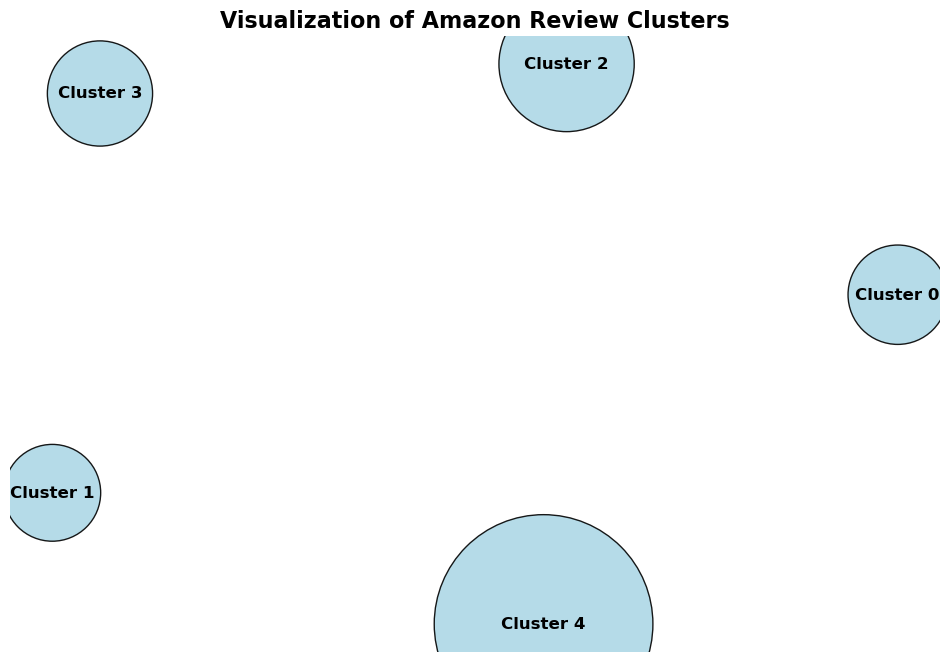

In [105]:
# Cluster reviews using KMeans
k = 5  # Choose the number of clusters (can be optimized using Elbow Method)
kmeans = KMeans(n_clusters=k, random_state=42)
reviews['cluster'] = kmeans.fit_predict(X)

# Count reviews in each cluster
cluster_counts = reviews['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Create a graph
G = nx.Graph()

# Add nodes with size proportional to review count
for _, row in cluster_counts.iterrows():
    G.add_node(f'Cluster {row["cluster"]}', size=row['count'])

# Optionally add edges (e.g., based on cluster similarity or shared keywords)
# Here, we skip adding edges for simplicity

# Prepare sizes for visualization
sizes = [G.nodes[node]['size'] * 10 for node in G]  # Scale sizes for clarity

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(
    G, pos, node_size=sizes, node_color='lightblue', edgecolors='black', alpha=0.9
)
nx.draw_networkx_labels(
    G, pos, font_size=12, font_color='black', font_weight='bold'
)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=1.0, edge_color='gray')

# Add title and remove axis
plt.title('Visualization of Amazon Review Clusters', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

In [91]:
# Get top keywords for each cluster
terms = tfidf.get_feature_names_out()  # Feature names from TF-IDF
for cluster in range(k):
    cluster_center = kmeans.cluster_centers_[cluster]
    top_indices = cluster_center.argsort()[-10:][::-1]  # Top 10 words
    top_words = [terms[idx] for idx in top_indices]
    print(f"Cluster {cluster}: {', '.join(top_words)}")

Cluster 0: loves, old, year, bought, tablet, daughter, grandson, son, gift, granddaughter
Cluster 1: easy, use, great, set, love, tablet, product, kids, loves, gift
Cluster 2: echo, alexa, music, love, great, home, amazon, plus, sound, smart
Cluster 3: good, price, great, product, tablet, recommend, works, kids, quality, use
Cluster 4: tablet, great, love, kindle, bought, kids, like, books, amazon, apps


In [95]:
# Average ratings per cluster
average_ratings = reviews.groupby('cluster')['reviews.rating'].mean()
print(average_ratings)


cluster
0    4.773438
1    4.796296
2    4.712329
3    4.451220
4    4.510690
Name: reviews.rating, dtype: float64
